In [1]:
from basic_nn import BasicNN, BasicNN_train
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_doses = torch.linspace(start = 0, end=1, steps =11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [3]:
model = BasicNN()

output_values = model(input_doses)
output_values

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

Text(0, 0.5, 'Effectiveness')

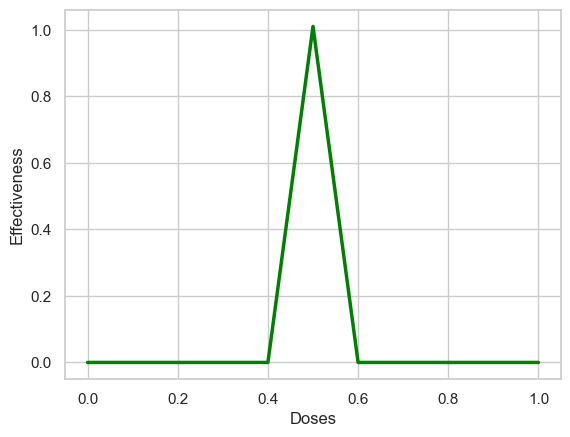

In [4]:
sns.set(style = 'whitegrid')
sns.lineplot(x=input_doses, y=output_values, color='green', linewidth=2.5)
plt.xlabel("Doses")
plt.ylabel("Effectiveness")

Text(0, 0.5, 'Effectiveness')

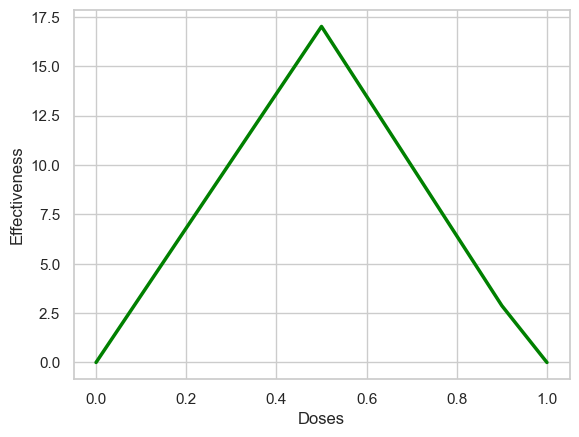

In [5]:
# Using model with output values with grad available. we detach them first before plotting.
input_doses = torch.linspace(start = 0, end=1, steps =11)
model = BasicNN_train()

output_values = model(input_doses)

sns.set(style = 'whitegrid')
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)
plt.xlabel("Doses")
plt.ylabel("Effectiveness")

# Model training

In [6]:
import torch.optim as SGD

inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

C:\ANACONDA3\envs\lchain\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
print("Final bias, before optimization:" + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss = 0
    
    for iteration in range(len(inputs)):
        
        input_i = inputs[iteration]
        labels_i = labels[iteration]

        output_i = model(input_i)
        loss = (output_i - labels_i)**2

        loss.backward()

        total_loss += float(loss)


    if (total_loss < 0.0001):
        print("Num steps:" + str(epoch))

        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step:" + str(epoch) + "Final Bias: " + str(model.final_bias.data) + "\n")

print("Final bias, after optimization:" + str(model.final_bias.data) + "\n")


Final bias, before optimization:tensor(0.)

Step:0Final Bias: tensor(-3.2020)

Step:1Final Bias: tensor(-5.7636)

Step:2Final Bias: tensor(-7.8129)

Step:3Final Bias: tensor(-9.4523)

Step:4Final Bias: tensor(-10.7638)

Step:5Final Bias: tensor(-11.8131)

Step:6Final Bias: tensor(-12.6525)

Step:7Final Bias: tensor(-13.3240)

Step:8Final Bias: tensor(-13.8612)

Step:9Final Bias: tensor(-14.2909)

Step:10Final Bias: tensor(-14.6348)

Step:11Final Bias: tensor(-14.9098)

Step:12Final Bias: tensor(-15.1298)

Step:13Final Bias: tensor(-15.3059)

Step:14Final Bias: tensor(-15.4467)

Step:15Final Bias: tensor(-15.5594)

Step:16Final Bias: tensor(-15.6495)

Step:17Final Bias: tensor(-15.7216)

Step:18Final Bias: tensor(-15.7793)

Step:19Final Bias: tensor(-15.8254)

Step:20Final Bias: tensor(-15.8623)

Step:21Final Bias: tensor(-15.8919)

Step:22Final Bias: tensor(-15.9155)

Step:23Final Bias: tensor(-15.9344)

Step:24Final Bias: tensor(-15.9495)

Step:25Final Bias: tensor(-15.9616)

Step:26F

Text(0, 0.5, 'Effectiveness')

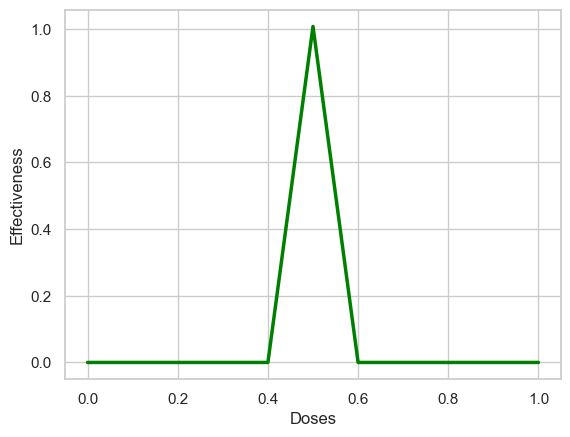

In [11]:
# Plotting the model output after training on the training data to see the fit.

output_values = model(input_doses)

sns.set(style = 'whitegrid')
sns.lineplot(x=input_doses, y=output_values.detach(), color='green', linewidth=2.5)
plt.xlabel("Doses")
plt.ylabel("Effectiveness")